# Spaceship Titanic

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

To help rescue crews and retrieve the lost passengers, We have to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!




We're going to take the following approach:


---

1. **`Problem Statement`**:  to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
2. **`Evaluation Metrics`**: We have to evaluate the test data based on classification accuracy, the percentage of predicted labels that are correct.
3. **`Understanding The Data`** : train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* **`PassengerId`** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **`HomePlanet`** - The planet the passenger departed from, typically their planet of permanent residence.
* **`CryoSleep`** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **`Cabin`** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **`Destination`** - The planet the passenger will be debarking to.
* **`Age`** - The age of the passenger.
* **`VIP`** - Whether the passenger has paid for special VIP service during the voyage.
* **`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck`** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **`Name`** - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. 

4. **`EDA(Exploratory Data Analysis)`** : We'll explore the data and try to get important insights from the data

5. **`Build A Model`** : Build a neural network model, and fit the data to the neural network

6. **`Improve The Model`**: Improve the deep learning model by adding extra layers, tweaking the learning rate and changing the number of epochs to see which performs better on the data

7. **`Evaluate On Test Data`**: Evaluate our model on the test data


---



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
titanic_df = pd.read_csv("/content/drive/MyDrive/spaceship-titanic/train.csv")

In [4]:
titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
titanic_df.shape

(8693, 14)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
titanic_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

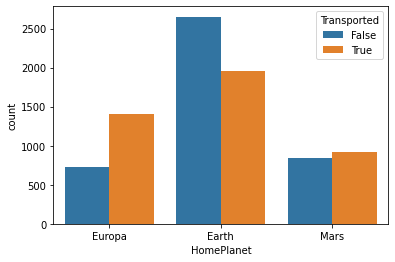

In [8]:
sns.countplot(x = titanic_df.HomePlanet,hue=titanic_df.Transported);

So as we can see there are more people from Earth than Europa and Mars. Nearly 2.5k people from Earth has failed to be transported where there is a slightly higher success rate from planet Europa and planet Mars 

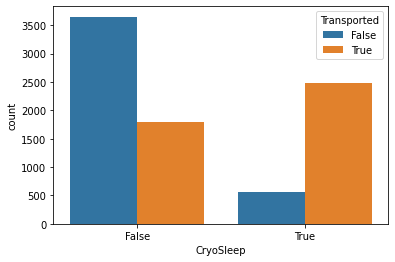

In [9]:
sns.countplot(x = titanic_df.CryoSleep,hue=titanic_df.Transported);

People who are in Cryosleep which is some kind of deep sleep during the voyage has better successful transportation rate than people who are not. Nearly 3.5k people who aint cryosleeping failed to be transported into their destination where nearly 2.5k people who are cryosleeping were successfully transported

In [10]:
titanic_df.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

## Feature Engineering

In [11]:
titanic_df["Age-Bins"] = pd.cut(x=titanic_df['Age'], bins=[0,9,19,29,39,49,59,69,79,89,99])

In [12]:
titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age-Bins
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(29, 39]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(19, 29]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(49, 59]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(29, 39]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(9, 19]"


In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  Age-Bins      8336 non-null   category
dtypes: bool(1), category(1), float64(6), object(7)
memory usage: 900.4+ KB


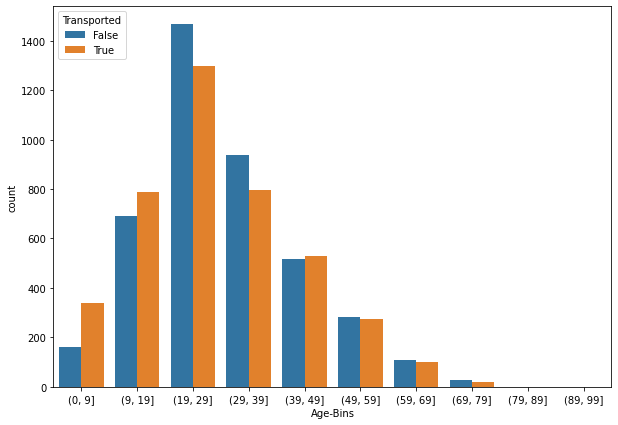

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x=titanic_df["Age-Bins"],hue=titanic_df.Transported)

In [15]:
titanic_df["Deck"] = titanic_df["Cabin"].str.split('/').str[0]

In [16]:
titanic_df["Num"] = titanic_df["Cabin"].str.split("/").str[1]

In [17]:
titanic_df["Side"] = titanic_df["Cabin"].str.split("/").str[2]

In [18]:
titanic_df["Total-Expense"] = titanic_df["RoomService"] + titanic_df["FoodCourt"] + titanic_df["ShoppingMall"]+titanic_df["Spa"] + titanic_df["VRDeck"]

In [19]:
titanic_df['Expense-Over-1500$'] = titanic_df['Total-Expense'].apply(lambda x: 'True' if x>1500 else 'False')

In [20]:
titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age-Bins,Deck,Num,Side,Total-Expense,Expense-Over-1500$
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(29, 39]",B,0,P,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(19, 29]",F,0,S,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(49, 59]",A,0,S,10383.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(29, 39]",A,0,S,5176.0,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(9, 19]",F,1,S,1091.0,False


In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         8693 non-null   object  
 1   HomePlanet          8492 non-null   object  
 2   CryoSleep           8476 non-null   object  
 3   Cabin               8494 non-null   object  
 4   Destination         8511 non-null   object  
 5   Age                 8514 non-null   float64 
 6   VIP                 8490 non-null   object  
 7   RoomService         8512 non-null   float64 
 8   FoodCourt           8510 non-null   float64 
 9   ShoppingMall        8485 non-null   float64 
 10  Spa                 8510 non-null   float64 
 11  VRDeck              8505 non-null   float64 
 12  Name                8493 non-null   object  
 13  Transported         8693 non-null   bool    
 14  Age-Bins            8336 non-null   category
 15  Deck                8494 non-null   ob

So, there are more failed transportation rate in people between 19-29 year old. Although kids made it safe during the transportation.

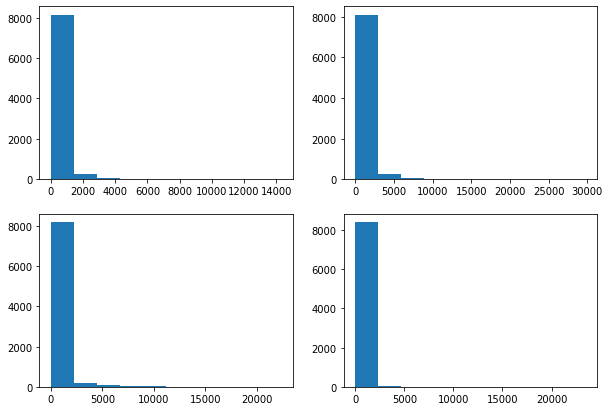

In [22]:
fig = plt.figure(figsize=(10,7))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.hist(titanic_df["RoomService"]);

plt.subplot(2, 2, 2)
plt.hist(titanic_df["FoodCourt"]);

plt.subplot(2, 2, 3)
plt.hist(titanic_df["Spa"]);

plt.subplot(2, 2, 4)
plt.hist(titanic_df["ShoppingMall"]);

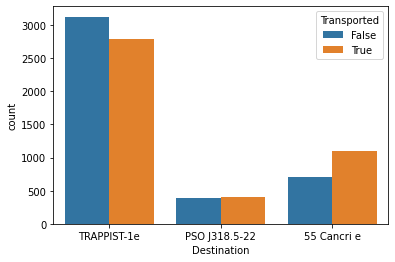

In [23]:
sns.countplot(x=titanic_df.Destination,hue=titanic_df.Transported);

## Data Preprocessing

In [24]:
titanic_df.drop(["Name","Age","Cabin","PassengerId"],axis=1,inplace=True)

In [25]:
num_features = []
cat_features = []

for label, content in titanic_df.items():
  if pd.api.types.is_numeric_dtype(content):
    num_features.append(label)
  elif pd.api.types.is_string_dtype(content):
    cat_features.append(label)
  elif pd.api.types.is_categorical_dtype(content):
    cat_features.append(label)  

In [26]:
num_features, cat_features

(['RoomService',
  'FoodCourt',
  'ShoppingMall',
  'Spa',
  'VRDeck',
  'Transported',
  'Total-Expense'],
 ['HomePlanet',
  'CryoSleep',
  'Destination',
  'VIP',
  'Age-Bins',
  'Deck',
  'Num',
  'Side',
  'Expense-Over-1500$'])

In [27]:
num_features.remove("Transported")
num_features

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total-Expense']

In [28]:
label = ["Transported"]

In [29]:
num_pipeline = Pipeline([("num_imputer",SimpleImputer(strategy="mean")),("scaler",MinMaxScaler())])
cat_pipeline = Pipeline([("cat_imputer",SimpleImputer(strategy="most_frequent")),("onehot",OneHotEncoder(handle_unknown="ignore"))])

ct = make_column_transformer((num_pipeline,num_features),(cat_pipeline,cat_features))

In [30]:
X = titanic_df.drop("Transported",axis=1)
y = titanic_df.Transported

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [31]:
ct.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['RoomService', 'FoodCourt', 'ShoppingMall',
                                  'Spa', 'VRDeck', 'Total-Expense']),
                                ('pipeline-2',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'Age-Bins', 'Deck', 'Num', 'Side',
                                  'Expense-Over-1500$'])])

In [32]:
X_train_transformed = ct.transform(X_train)
X_val_transformed = ct.transform(X_val)

X_train_transformed.shape, X_val_transformed.shape

((6954, 1783), (1739, 1783))

In [33]:
y_train.shape, y_val.shape

((6954,), (1739,))

In [34]:
le = LabelEncoder()

In [35]:
le.fit(y_train)

LabelEncoder()

In [36]:
le.classes_

array([False,  True])

In [37]:
y_train_transformed = le.transform(y_train)

In [38]:
y_val_transformed = le.transform(y_val)

In [39]:
y_train ==y_train_transformed

2333    True
2589    True
8302    True
8177    True
500     True
        ... 
5734    True
5191    True
5390    True
860     True
7270    True
Name: Transported, Length: 6954, dtype: bool

In [40]:
y_train_transformed.shape, y_val_transformed.shape

((6954,), (1739,))

## Build a model

Data preparation is done. Now its time to build a model

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model_1.fit(X_train_transformed,y_train_transformed,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


218/218 [==============================] - 3s 6ms/step - loss: 0.5663 - accuracy: 0.7105
Epoch 2/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4659 - accuracy: 0.7824
Epoch 3/100
218/218 [==============================] - 1s 4ms/step - loss: 0.3848 - accuracy: 0.8351
Epoch 4/100
218/218 [==============================] - 1s 4ms/step - loss: 0.2922 - accuracy: 0.8822
Epoch 5/100
218/218 [==============================] - 1s 6ms/step - loss: 0.2372 - accuracy: 0.9177
Epoch 6/100
218/218 [==============================] - 1s 5ms/step - loss: 0.2549 - accuracy: 0.9234
Epoch 7/100
218/218 [==============================] - 1s 6ms/step - loss: 0.2311 - accuracy: 0.9443
Epoch 8/100
218/218 [==============================] - 1s 4ms/step - loss: 0.1536 - accuracy: 0.9530
Epoch 9/100
218/218 [==============================] - 1s 6ms/step - loss: 0.0927 - accuracy: 0.9789
Epoch 10/100
218/218 [==============================] - 1s 5ms/step - loss: 0.1075 - accuracy: 0.9744
E

In [ ]:
model_1.evaluate(X_val_transformed,y_val_transformed)

Looks like our model is overfitting!

In [43]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_2.fit(X_train_transformed,y_train_transformed,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


218/218 [==============================] - 2s 4ms/step - loss: 1.5507 - accuracy: 0.4967
Epoch 2/100
218/218 [==============================] - 1s 4ms/step - loss: 0.8892 - accuracy: 0.4967
Epoch 3/100
218/218 [==============================] - 1s 4ms/step - loss: 0.5497 - accuracy: 0.4967
Epoch 4/100
218/218 [==============================] - 1s 5ms/step - loss: 0.3745 - accuracy: 0.4967
Epoch 5/100
218/218 [==============================] - 1s 5ms/step - loss: 0.2852 - accuracy: 0.4967
Epoch 6/100
218/218 [==============================] - 1s 4ms/step - loss: 0.2318 - accuracy: 0.4967
Epoch 7/100
218/218 [==============================] - 1s 4ms/step - loss: 0.2008 - accuracy: 0.4967
Epoch 8/100
218/218 [==============================] - 1s 4ms/step - loss: 0.1846 - accuracy: 0.4967
Epoch 9/100
218/218 [==============================] - 1s 6ms/step - loss: 0.1772 - accuracy: 0.4967
Epoch 10/100
218/218 [==============================] - 1s 5ms/step - loss: 0.1743 - accuracy: 0.4967
E

In [44]:
model_2.evaluate(X_val_transformed,y_val_transformed)

55/55 [==============================] - 0s 2ms/step - loss: 4.0359 - accuracy: 0.7102


[4.0358734130859375, 0.7101782560348511]

In [45]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model_3.fit(X_train_transformed,y_train_transformed,epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


218/218 [==============================] - 2s 5ms/step - loss: 0.3568 - accuracy: 0.5423
Epoch 2/200
218/218 [==============================] - 1s 5ms/step - loss: 0.1373 - accuracy: 0.7529
Epoch 3/200
218/218 [==============================] - 1s 5ms/step - loss: 0.1105 - accuracy: 0.8008
Epoch 4/200
218/218 [==============================] - 1s 5ms/step - loss: 0.0918 - accuracy: 0.8338
Epoch 5/200
218/218 [==============================] - 1s 6ms/step - loss: 0.0797 - accuracy: 0.8576
Epoch 6/200
218/218 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.8749
Epoch 7/200
218/218 [==============================] - 1s 6ms/step - loss: 0.0615 - accuracy: 0.8903
Epoch 8/200
218/218 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.8983
Epoch 9/200
218/218 [==============================] - 1s 5ms/step - loss: 0.0500 - accuracy: 0.9098
Epoch 10/200
218/218 [==============================] - 1s 5ms/step - loss: 0.0453 - accuracy: 0.9123
E

In [ ]:
model_3.evaluate(X_val_transformed,y_val_transformed)

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(1)
])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=0,
    restore_best_weights=True
)
model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model_4.fit(X_train_transformed,y_train_transformed,epochs=200,verbose=2,callbacks=[early_stopping])

In [48]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(80,activation="softmax"),
    tf.keras.layers.Dense(10,activation="softmax"),
    tf.keras.layers.Dense(1)
])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=["accuracy"])
model_5.fit(X_train_transformed,y_train_transformed,epochs=200,verbose=2,callbacks=[early_stopping])

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_11/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_11/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_11/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


218/218 - 2s - loss: 0.2058 - accuracy: 0.4915 - 2s/epoch - 9ms/step
Epoch 2/200
218/218 - 1s - loss: 0.1502 - accuracy: 0.7084 - 899ms/epoch - 4ms/step
Epoch 3/200
218/218 - 1s - loss: 0.1479 - accuracy: 0.6596 - 897ms/epoch - 4ms/step
Epoch 4/200
218/218 - 1s - loss: 0.1456 - accuracy: 0.7030 - 842ms/epoch - 4ms/step
Epoch 5/200
218/218 - 1s - loss: 0.1352 - accuracy: 0.7489 - 862ms/epoch - 4ms/step
Epoch 6/200
218/218 - 1s - loss: 0.1354 - accuracy: 0.7603 - 1s/epoch - 5ms/step
Epoch 7/200
218/218 - 1s - loss: 0.1300 - accuracy: 0.7722 - 1s/epoch - 5ms/step
Epoch 8/200
218/218 - 1s - loss: 0.1225 - accuracy: 0.7900 - 957ms/epoch - 4ms/step
Epoch 9/200
218/218 - 1s - loss: 0.1285 - accuracy: 0.7829 - 1s/epoch - 5ms/step
Epoch 10/200
218/218 - 1s - loss: 0.1306 - accuracy: 0.7814 - 950ms/epoch - 4ms/step
Epoch 11/200
218/218 - 1s - loss: 0.1238 - accuracy: 0.8054 - 1s/epoch - 5ms/step
Epoch 12/200
218/218 - 1s - loss: 0.1195 - accuracy: 0.7972 - 890ms/epoch - 4ms/step
Epoch 13/200
218

In [ ]:
model_5.evaluate(X_val_transformed,y_val_transformed)

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(80,activation="softmax"),
    tf.keras.layers.Dense(80,activation="softmax"),
    tf.keras.layers.Dense(10,activation="softmax"),
    tf.keras.layers.Dense(1)
])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)
model_6.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),metrics=["accuracy"])
model_6.fit(X_train_transformed,y_train_transformed,epochs=200,verbose=2,callbacks=[early_stopping])

In [ ]:
model_6.evaluate(X_val_transformed,y_val_transformed)

In [52]:
model_7 =   tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
    tf.keras.layers.Dense(1)])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)
model_7.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model_7.fit(X_train_transformed,y_train_transformed,epochs=200,verbose=2,callbacks=[early_stopping])

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_19/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_19/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_19/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


218/218 - 3s - loss: 0.1781 - accuracy: 0.5016 - 3s/epoch - 12ms/step
Epoch 2/200
218/218 - 2s - loss: 0.1743 - accuracy: 0.4958 - 2s/epoch - 10ms/step
Epoch 3/200
218/218 - 2s - loss: 0.1742 - accuracy: 0.4958 - 2s/epoch - 9ms/step
Epoch 4/200
218/218 - 2s - loss: 0.1742 - accuracy: 0.5001 - 2s/epoch - 9ms/step
Epoch 5/200
218/218 - 2s - loss: 0.1740 - accuracy: 0.4993 - 2s/epoch - 9ms/step
Epoch 6/200
218/218 - 2s - loss: 0.1745 - accuracy: 0.4999 - 2s/epoch - 8ms/step


In [ ]:
model_7.evaluate(X_val_transformed,y_val_transformed)

In [ ]:
forest= RandomForestClassifier(n_estimators=100, random_state=42)

forest.fit(X_train_transformed,y_train_transformed)

In [ ]:
forest.score(X_val_transformed,y_val_transformed)

In [ ]:

params = {"n_estimators":[100,200,500],'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],"bootstrap":[True,False]}

forest = RandomForestClassifier()
gs_clf = GridSearchCV(forest,params,cv=5,scoring="accuracy")  
gs_clf.fit(X_train_transformed,y_train_transformed) 


In [ ]:
best_model = gs_clf.best_estimator_ 

In [ ]:
best_model.score(X_val_transformed,y_val_transformed)

In [ ]:
gs_clf.score(X_val_transformed,y_val_transformed)

In [ ]:
vector_machine = SVC()
vector_machine.fit(X_train_transformed,y_train_transformed)

In [ ]:
vector_machine.score(X_val_transformed,y_val_transformed)

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/spaceship-titanic/test.csv")

In [ ]:
test_data.head()

In [ ]:
test_data.shape

In [ ]:
clone = test_data.copy()

In [ ]:
clone["Age-Bins"] = pd.cut(x=clone['Age'], bins=[0,9,19,29,39,49,59,69,79,89,99])

In [ ]:
clone["Deck"] = clone["Cabin"].str.split('/').str[0]

In [ ]:
clone["Num"] = clone["Cabin"].str.split('/').str[1]

In [ ]:
clone["Side"] = clone["Cabin"].str.split('/').str[2]

In [ ]:
clone["Total-Expense"] = clone["RoomService"] + clone["FoodCourt"] + clone["ShoppingMall"]+clone["Spa"] + clone["VRDeck"]

In [ ]:
clone['Expense-Over-1500$'] = clone['Total-Expense'].apply(lambda x: 'True' if x>1500 else 'False')

In [ ]:
clone.head()

In [ ]:
clone.drop(["PassengerId","Name","Cabin","Age"],axis=1,inplace=True)

In [ ]:
X_test_transformed = ct.transform(clone)

In [ ]:
X_test_transformed.shape

In [ ]:
y_train_transformed

In [ ]:
y_preds = forest.predict(X_test_transformed)
y_preds

In [ ]:
predictions =[]
for i in y_preds:
  if i==1:
    predictions.append(True)
  else:
    predictions.append(False) 
predictions==y_preds     

In [ ]:
submission_df = pd.DataFrame()
submission_df["PassengerId"] = test_data.PassengerId
submission_df["Transported"] = predictions
submission_df.to_csv("Submission2.csv",index=False)

In [ ]:
pd.read_csv("Submission2.csv")

In [ ]:
from google.colab import files
files.download("Submission2.csv")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train_transformed,y_train_transformed)

In [ ]:
extra_tree.score(X_val_transformed,y_val_transformed)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train_transformed,y_train_transformed)

In [ ]:
gradient.score(X_val_transformed,y_val_transformed)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hist_gradient = HistGradientBoostingClassifier()

In [ ]:
hist_gradient.fit(X_train_transformed.toarray(),y_train_transformed)

In [ ]:
hist_gradient.score(X_val_transformed.toarray(),y_val_transformed)

In [ ]:
y_preds = hist_gradient.predict(X_test_transformed.toarray())

In [ ]:
y_preds

In [ ]:
predictions =[]
for i in y_preds:
  if i==1:
    predictions.append(True)
  else:
    predictions.append(False) 
predictions==y_preds     

In [ ]:
submission_df = pd.DataFrame()
submission_df["PassengerId"] = test_data.PassengerId
submission_df["Transported"] = predictions
submission_df.to_csv("Submission3.csv",index=False)

In [ ]:
from google.colab import files
files.download("Submission3.csv")

This submission scored 0.80196 on Kaggle, let's improve this histgradient boosting classifier by hyperparameter tuning

In [ ]:
params = {"learning_rate":[0.1,0.01,0.001],"max_depth":[None,2,4,8,12],"min_samples_leaf":[2,4,6,8],"l2_regularization":[0,2,4,6]}
hist_gradient_model = HistGradientBoostingClassifier(loss="binary_crossentropy",random_state=42,verbose=2)
gs_clf_2 = GridSearchCV(hist_gradient_model,params,cv=10,n_jobs=-1,return_train_score=True)

In [ ]:
gs_clf_2.fit(X_train_transformed.toarray(),y_train_transformed)

In [ ]:
gs_clf.score(X_val_transformed.toarray(),y_val_transformed)

In [ ]:
grid_search_model = gs_clf.best_params_


In [ ]:
import joblib
joblib.dump(grid_search_model,"grid_search_model")

In [ ]:
loaded_model = joblib.load("grid_search_model")